# Question 4

In [2]:
import numpy as np
import math
import scipy
from control.matlab import *
import control as cont
import matplotlib.pyplot as plt
pie=np.pi

Stepinfo function which gives all the useful information like overshoot, rise time and settle time from the response function

In [23]:
def stepinfo(t,yout):
    print ("Overshoot",(yout.max()/yout[-1]-1)*100,'%')
    print ("Time rise",t[next(i for i in range(0,len(yout)-1) if yout[i]>yout[-1]*.90)]-t[0])
    print ("Time settle",t[next(len(yout)-i for i in range(2,len(yout)-1) if abs(yout[-i]/yout[-1])>1.02)]-t[0])

In [24]:
M=10
ts=2

Calculating tau and wn from formulas
$$M=100e^{\frac{-\zeta \pi}{\sqrt{1-\zeta^{2}}}}$$
$$ts=\frac{4}{\zeta \omega_{n}}$$

In [25]:
tau=np.sqrt(np.log(M/100)**2/(np.log(M/100)**2+pie**2))
wn=4/(tau*ts)

Calculating gamma and omega from the formulas
$$\gamma=\tan^{-1} \frac{2\zeta}{\sqrt{\sqrt{1+4\zeta^{4}}-2\zeta^{2}}}$$
$$\omega_{gc}=\omega_{n}{\sqrt{\sqrt{1+4\zeta^{4}}-2\zeta^{2}}}$$

In [26]:
gamma=np.arctan(2*tau/np.sqrt(np.sqrt(1+4*tau**4)-2*tau**2))*180/pie
wgc=wn*np.sqrt(np.sqrt(1+4*tau**4)-2*tau**2)
print(f"Gamma {gamma} wgc {wgc}")
print(f"w natural {wn}")

(num,den)=zpk2tf([-1,-0.01],[-10],100)
den1=tf([1],[1,2,2])
den2=tf([1],[1,0.02,0.0101])
H=tf(num,den)
H=H*den1*den2
print(f"Transfer function {H}")

Gamma 58.59306826496366 wgc 2.4422747101330673
w natural 3.38320725639016
Transfer function 
                    100 s^2 + 101 s + 1
----------------------------------------------------------
s^5 + 12.02 s^4 + 22.25 s^3 + 20.56 s^2 + 0.6222 s + 0.202



## Bode Plot of H

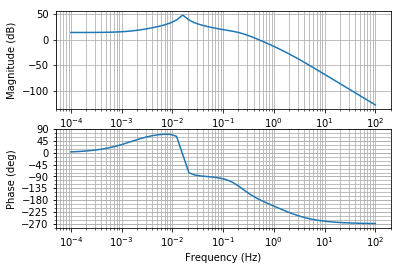

In [27]:
bode(H);

In [28]:
[gm,pm,wg,wm]=margin(H)
print (f"gain-margin {gm} phase-margin {pm} \ngain cross over freq {wg} phase cross over freq {wm}")

phi=gamma-pm
wm=wm
print(f"\nPhi {phi} w_m {wm}")

alpha=(1-np.sin(phi*pie/180))/(1+np.sin(phi*pie/180))
print(f"\nAlpha {alpha}")

T=1/np.sqrt(alpha)/wm
print(f"T {T}")

Gc=tf([T,1],[alpha*T,1])
Hnew=H*Gc
print(f"\nHnew {Hnew}")

gain-margin 1.214662566961802 phase-margin 3.7857102810716015 
gain cross over freq 3.4359780521729917 phase cross over freq 3.1344441272838512

Phi 54.80735798389206 w_m 3.1344441272838512

Alpha 0.1005828635112053
T 1.0059524889079905

Hnew 
                      100.6 s^3 + 201.6 s^2 + 102 s + 1
-----------------------------------------------------------------------------
0.1012 s^6 + 2.216 s^5 + 14.27 s^4 + 24.33 s^3 + 20.62 s^2 + 0.6426 s + 0.202



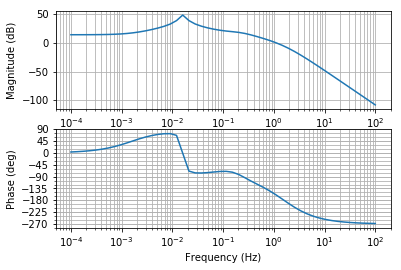

Phase margin 20.823595702607207 Gain margin 6.246114286537816
Phi new 54.80735798389206


In [45]:
bode(Hnew)
plt.show()
[gm,pm2,wg,wm2]=margin(Hnew)
print(f"Phase margin {pm2} Gain margin {wg2}")
print(f"Phi new {phi}")

Since there is a huge difference between the phase margin and the desired value, we increment phi by 60 degrees

In [43]:
phi_one=phi+60
print(f"Phi altered {phi_one}")

alpha_one=(1-np.sin(phi_one*pie/180))/(1+np.sin(phi_one*pie/180))
print(f"Alpha {alpha_one}")

mag10 = 20*np.log10(1/np.sqrt(alpha_one))
print(f"decibels magnitude {mag10}")

mag_one=np.sqrt(alpha_one)
print(f"Magnitude descent needed to offset {mag_one}")

Phi altered 114.80735798389206
Alpha 0.04836989761311832
decibels magnitude 13.154248319025266
Magnitude descent needed to offset 0.21993157484344608


To calculate the frequency at which magnitude is square root of alpha, we find the gain crossover frequency of the transfer function H/square root of alpha

In [40]:
[gm1,pm1,wm1,wg1]=margin(H/mag_one)
print(f"Cross over {wg1}")

T_1=1/np.sqrt(alpha_one)/wg1
print(f"T_1 {T_1}")

Gc_one=tf([T_1,1],[alpha_one*T_1,1])
Hnew_one=Gc_one*H
print(Hnew_one)

Cross over 6.246114286537809
T_1 0.7279515743095443

                      72.8 s^3 + 173.5 s^2 + 101.7 s + 1
-----------------------------------------------------------------------------
0.03521 s^6 + 1.423 s^5 + 12.8 s^4 + 22.97 s^3 + 20.58 s^2 + 0.6293 s + 0.202



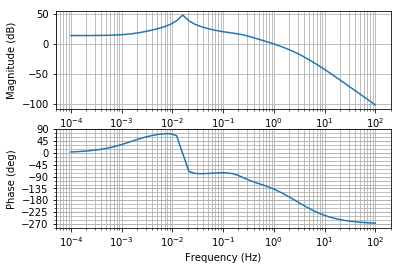

Phase margin 42.84878119640814 Gain margin 6.246114286537816


In [41]:
bode(Hnew_one)
plt.show()
[gm2,pm2,wm2,wg2]=margin(Hnew_one)
print(f"Phase margin {pm2} Gain margin {wg2}")

## Step Response of Closed Loop System

Overshoot 29.495260712314074 %
Time rise 0.266026602660266
Time settle 8.586858685868586


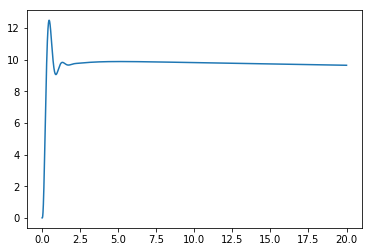

In [42]:
T, yout = cont.step_response(feedback(Hnew_one,1), np.linspace(0,20,10000))
plt.plot(T,yout*10)
stepinfo(T,yout*10)